# Name: PRATYUSH UPADHYAY
### Email id: iampratyush4@gmail.com
### Github Profile:https://github.com/iampratyush4
### Linkedin Profile: https://www.linkedin.com/in/pratyushupadhyay/

### Data Science and Business Analytics Intern @ THE SPARKS FOUNDATION.

#### GRIPJUNE21

#### Task1: Prediction using Supervised ML

### Problem Statement: Predict the percentage of an student based on the no. of study hours

In [37]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [38]:
# Reading data from remote link
link = "http://bit.ly/w-data"
stu_data = pd.read_csv(link)
print("Data imported successfully")
stu_data.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [39]:
#Dimension of the Dataframe:
stu_data.shape

(25, 2)

In [42]:
## checking the information about each columns of data of our dataset
stu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [43]:
#checking for the null values:
stu_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [44]:
#Describing the dataset:

stu_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Observation-1: Hence, there is no NaN or null data present in our dataset.**

### **Preparing the data**
#### Let's plot our data points on 2-D graph to visualize our dataset and try to find manually any relationship/assumptions between the data. Here is the script to plot a graph between our input and output variables as following:

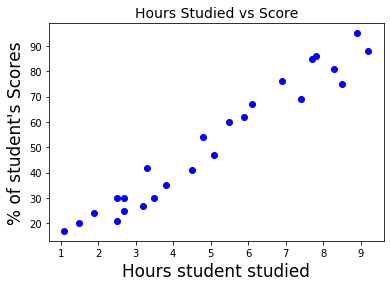

In [45]:
#Plotting Scater plot:

plt.xlabel('Hours student studied',fontsize = 17)
plt.ylabel('% of student\'s Scores',fontsize = 17)
plt.title('Hours Studied vs Score', fontsize = 14)
plt.scatter(stu_data.Hours,stu_data.Scores, color='blue', marker='o')
plt.show()

In [46]:
# Divide the data into "attributes" (inputs) and "labels" (outputs)
X = stu_data.iloc[:, :-1].values  
y = stu_data.iloc[:, 1].values 

In [47]:
# Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
#We'll do this by using Scikit-Learn's built-in train_test_split() method:
    
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [48]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 
print("Training of Model is complete.")

Training of Model is complete.


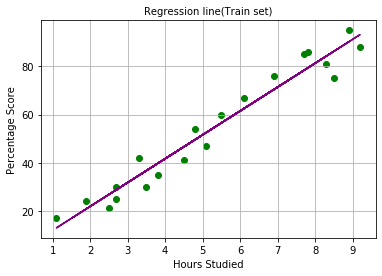

In [49]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_
plt.scatter(X_train, y_train,color='green')
plt.plot(X, line, color = 'purple')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title("Regression line(Train set)",fontsize=10)
plt.grid()
plt.show()

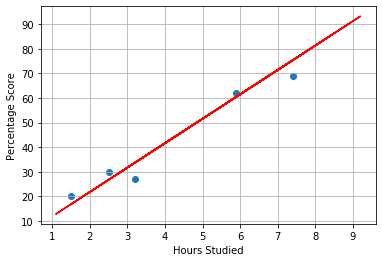

In [50]:
#plootting line on test data

plt.scatter(X_test, y_test)
plt.plot(X, line, color = 'red')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()


In [51]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [52]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [53]:
# goodness of fit test
from sklearn import metrics  
print('Accuracy of Actual and Predicted R-squared is:', metrics.r2_score(y_test, y_pred)) 

Accuracy of Actual and Predicted R-squared is: 0.9454906892105356


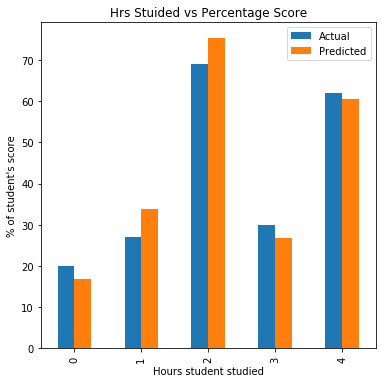

In [54]:
compare.plot(kind="bar", figsize=(6,6))
plt.title('Hrs Stuided vs Percentage Score')
plt.xlabel('Hours student studied')
plt.ylabel('% of student\'s score')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAb_E = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",RMSE)
print("Mean Absolute Error     = ",MAb_E)

Mean Squared Error      =  21.5987693072174
Root Mean Squared Error =  4.6474476121003665
Mean Absolute Error     =  4.6474476121003665


In [56]:
# You can also test with your own data
hours = [9.25]
result = reg.predict([hours])
print("Predicted Score for 9.25 hours/day = {}".format(round(result[0],2)))

Predicted Score for 9.25 hours/day = 93.69


## Conclusion: Therefore if a student for 9.25 hrs/day then student will secure 93.69 Marks.